In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import numpy as np
import math
from scipy import stats
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random 
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from IPython.display import clear_output

# Evaluation Final

#### Brenda Corina Cerezo Silva

## Problema 1
Usando el conjunto de datos llamados problem1.csv (x_training, y_training):
<ol>
  <li>Encontrar el polinomio que ajusta mejor a los datos de entrenamiento</li>
  <li>Usando el criterio AIC, escoger el polinomio que mejor ajusta a los datos.</li>
  <li>Validar el polinomio con el conjunto de datos llamado problema1.csv (x_test, y_test)</li> 
</ol>

### Solución

In [2]:
#Se leen los datos
datos1 = pd.read_csv('problem1.csv')
datos1.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


In [3]:
print(datos1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X_training  134 non-null    float64
 1   Y_training  134 non-null    float64
 2   X_test      21 non-null     float64
 3   Y_test      21 non-null     float64
dtypes: float64(4)
memory usage: 4.3 KB
None


Se cuenta con 134 datos de la forma (x,y) para entrenar el modelo y 21 datos para la fase de prueba.

In [4]:
#Apartamos los datos que servirán de entrenamiento
train1 = datos1[["X_training", "Y_training"]]
test1 = datos1[["X_test", "Y_test"]]

A continuación, se muestra la gráfica de los datos de entrenamiento

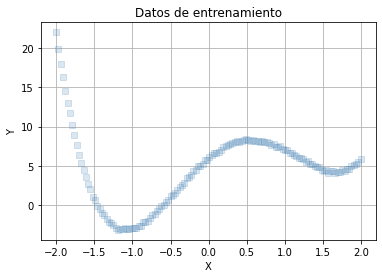

In [5]:
#Graficamos los datos
ax = plt.plot(train1.X_training,train1.Y_training,'bs',alpha=0.2,label='Datos de entrenamiento', lw = 1, color = "steelblue")
plt.title("Datos de entrenamiento")
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Ahora bien, se calcula el AIC y RSS de varios polinomios de diferentes grados, desde 0 hasta 15, para seleccionar al mejor modelo.

In [6]:
Pol_Max = 15 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [7]:
x = train1.X_training
y = train1.Y_training
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


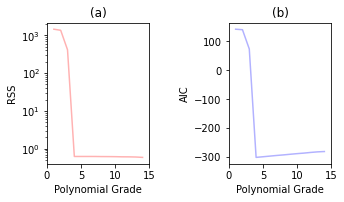

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

Se puede observar, que el grado que mejor ajusta a los datos es 4.

In [9]:
grade = np.argmin(AICv)+1
grade

4

In [10]:
coef = poly.polyfit(train1.X_training,train1.Y_training, grade)
model = poly.Polynomial(coef)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

In [11]:
RSS=0.5*np.sum((y-model(train1.X_training))**2)
AIC = len(train1.X_training)*math.log10(RSS/len(train1.X_training))+ 2*len(coef)*len(train1.X_training)/(len(train1.X_training)-len(coef)-1)
print(AIC,RSS)

-301.88036630232557 0.6253760482745625


Redondeando los coeficientes estimados a un decimal, resulta que el mejor ajuste a los datos lo tiene el modelo:

$$y=6+8x-6x^2-3x^3+2x^4$$

con un valor AIC de -301.88 y RSS de 0.63.

Ahora bien, en la siguiente gráfica se observan los datos completos, tanto los de entrenamiento como los de prueba. En rojo se ve el modelo estimado con los datos de prueba y en negro se ve la *predicción* usando los valores de $x$ de la prueba. Claramente, el modelo tiene un muy buen ajuste.


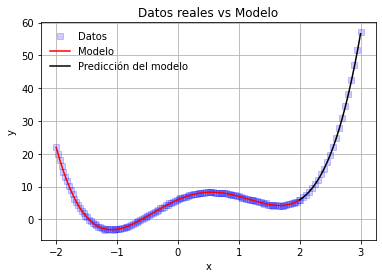

In [12]:
plt.plot(train1.X_training,train1.Y_training,'bs',alpha=0.2)
plt.plot(test1.X_test,test1.Y_test,'bs',alpha=0.2, label='Datos')
plt.plot(train1.X_training, model(train1.X_training),'r', label='Modelo')
plt.plot(test1.X_test, model(test1.X_test),'black', label='Predicción del modelo')
plt.legend(loc='best', frameon=False)
plt.title("Datos reales vs Modelo")
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Por último, se hizo una validación cruzada en la que podemos ver que el grado seleccionado, es adecuado.

In [13]:
# C-V para el modelo que tenemos.
test = test1.dropna()
poly_features = PolynomialFeatures(degree=grade)
X_poly = poly_features.fit_transform(test)
poly = LinearRegression()
np.mean(cross_val_score(poly, X_poly, test["Y_test"], cv=5))

1.0

Text(0, 0.5, 'Standarized Exponential Mean Scores of C-V')

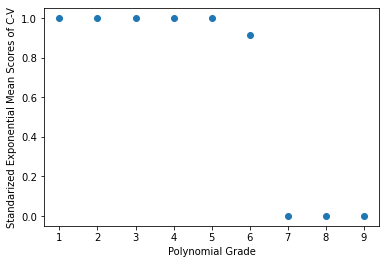

In [14]:
def create_polynomial_regression_model(degree):
 poly_features = PolynomialFeatures(degree=degree)
 X_poly = poly_features.fit_transform(test)
 poly = LinearRegression()
 return np.exp(np.mean(cross_val_score(poly, X_poly, test["Y_test"], cv=5)))/np.exp(1)
poly_cv = []
for i in range(1,10):
 poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,10),poly_cv)
plt.xlabel('Polynomial Grade')
plt.ylabel('Standarized Exponential Mean Scores of C-V')

# Problema 2

Teniendo la siguiente tabla lógica

<table>
<tr><td>

|$x_1$|$x_2$|$x_1\&x_2$|
|--|--|--|
|0|0|1|    
|1|0|1|
|0|1|1|
|1|1|0|    
    
</td><td>

|$x_1$|$x_2$|$x_1\$x_2$| 
|--|--|--|
|0|0|0|    
|1|0|0|
|0|1|0|
|1|1|1|

</td></tr> </table>

Usando Keras, construya los operadores $\&$ y $\$$ con un simple perceptrón. Si A=[1.001, 0, 0.001, 1], B=[0, 1, 0, 1] y C=[0, 1, 1, 0]. Calcule la operación (A&B)$\$$C con el perceptrón.

### Solución

Con el siguiente código se hizo una red neuronal de una sola capa para cada una de las dos operaciones.

In [15]:
#Red para la operación ampersand &
# The input and output, i.e. truth table, of a NAND gate
x_train = np.array([[0,0],[1,0],[0,1],[1,1]], "uint8")
y_train = np.array([[1],[1],[1],[0]], "uint8")
 
# Create neural networks model
modelapmersand = Sequential()
# Add layers to the model
modelapmersand.add(Dense(5, activation='relu', input_dim=2))      # first hidden layer
#modelapmersand.add(Dense(3, activation='relu'))                   # second hidden layer
modelapmersand.add(Dense(1, activation='sigmoid'))                # output layer
 
# Compile the neural networks model
modelapmersand.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the neural networks model
modelapmersand.fit(x_train, y_train, epochs=5000)
clear_output()

In [16]:
#Red para la operación dollar $
# The input and output, i.e. truth table, of a NAND gate
x_train = np.array([[0,0],[1,0],[0,1],[1,1]], "uint8")
y_train = np.array([[0],[0],[0],[1]], "uint8")
 
# Create neural networks model
modeldollar = Sequential()
# Add layers to the model
modeldollar.add(Dense(5, activation='relu', input_dim=2))      # first hidden layer
#modeldolar.add(Dense(3, activation='relu'))                   # second hidden layer
modeldollar.add(Dense(1, activation='sigmoid'))                # output layer
 
# Compile the neural networks model
modeldollar.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the neural networks model
modeldollar.fit(x_train, y_train, epochs=5000)
clear_output()

La siguiente lista es la tabla lógica que devuelve la red neuronal para cada una de las dos operaciones:

In [17]:
# Test the output of the trained neural networks based & gate
x_train = np.array([[0,0],[1,0],[0,1],[1,1]], "uint8")
y_predict = modelapmersand.predict(x_train)
print(y_predict)

[[0.9995765 ]
 [0.99781406]
 [0.99817073]
 [0.0018591 ]]


In [18]:
# Test the output of the trained neural networks based $ gate
x_train = np.array([[0,0],[1,0],[0,1],[1,1]], "uint8")
y_predict = modeldollar.predict(x_train)
print(y_predict)

[[2.8276443e-04]
 [5.4309905e-02]
 [1.1852980e-03]
 [9.9854219e-01]]


Ahora bien, A$\&$B debería dar un vector similar a
$$[1, 1, 1, 0],$$
pues esta operación devuelve 0 sólo si los dos valores son 1, esto es, recodermos que A=[1.001, 0, 0.001, 1] y B=[0, 1, 0, 1], entonces:

$$1.001 \& 0  \approx 1 $$
$$0 \& 1 = 1 $$
$$0.001 \& 0  \approx 1 $$
$$1 \& 1  = 0 $$

Al obtener la operación con la red neuronal estimada se obtiene el siguiente resultado, que nos permite concluir que la red programada es realmente buena.

In [19]:
#Se quiere evaluar A&B
A = np.array([1.001, 0, 0.001, 1])
B = np.array([0, 1, 0, 1])
x_test = np.array(np.dstack((A, B)))
AampersandB = modelapmersand.predict(x_test)
print(AampersandB)

[[[0.99780214]
  [0.99817073]
  [0.9995748 ]
  [0.0018591 ]]]


Por otro lado, al operar este resultado para conocer (A&B)$\$$C, donde (A&B) = [0.9969, 0.9458, 0.9993, 0.0033], C=[0, 1, 1, 0], y la operación dollar devuelve 1 sólo si los dos valores son 1, se debería tener un resultado similar a:
$$0.9969 \$ 0  \approx 0 $$
$$0.9458 \$ 1 \approx 1 $$
$$0.9993 \$ 1  \approx 1 $$
$$0.0033 \$ 0  \approx 0 $$
Al obtener la operación con la red neuronal estimada se obtiene el siguiente resultado, que nos permite concluir que la red programada es realmente buena.

In [20]:
C = np.array([0, 1, 1, 0])
x_test = np.array(np.dstack((AampersandB, C)))
result = modeldollar.predict(x_test)
print(result)

[[[5.4309905e-02]
  [9.9850643e-01]
  [9.9853396e-01]
  [2.8693676e-04]]]


## Problema 3

De un ensayo clínico, tenemos 12 pacientes con infección por VIH. Después del tratamiento, la enfermedad progresó en 6 pacientes (1) y en 6 pacientes la infección no progresó (0). Se toman cuatro medidas en los 12 pacientes (edad, niveles de azúcar, niveles de células T y colesterol). ¿Qué medida se puede utilizar como marcador para describir la progresión de la enfermedad? ¿Cuáles serán los criterios para predecir la progresión? Los datos se pueden encontrar en "problem3.csv" (x_age, x_sugar, x_Tcell, x_cholesterol, result). Ordene los datos y explique brevemente sus resultados. La variable "y" (objetivo) es un vector de 0 y 1 para representar la progresión.

### Solución

In [21]:
#Se leen los datos
datos3 = pd.read_csv('problem3.csv')
datos3.head()

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0


La metodología para la solución de este problema es:
<ol>
  <li>Se ajustaron cuatro modelos logit. Cada modelo con sólo una variable explicativa (correspondientes a cada una de las cuatro variables que se tienen). Para ajustar los modelos se usó el 70% de los datos como entrenamiento.</li>
  <li>Después, para cada modelo se graficó la matríz de confusión y la curva ROC.</li>
  <li>Por último, se interpretan los coeficientes y se dan conclusiones.</li> 
</ol>

In [22]:
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

### Logit con x_age como cariable explicativa

In [23]:
xe = datos3[["x_age"]]
y = datos3[["y"]]
x_train, x_test, y_train, y_test = train_test_split(xe, y, test_size=0.3, random_state=5)

In [24]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\Brendis\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5

Text(0, 0.5, 'Age')

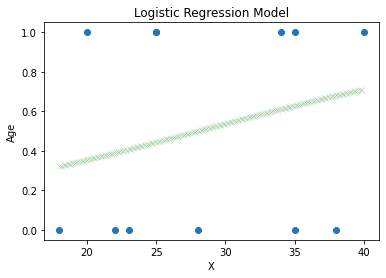

In [25]:
X = np.arange(18, 40, 0.1)
X = X.reshape(-1, 1)
plt.scatter(xe, y)
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Age')

In [26]:
model.coef_

array([[0.07509664]])

In [27]:
model.intercept_

array([-2.09950044])

In [28]:
cm = confusion_matrix(y, model.predict(xe))

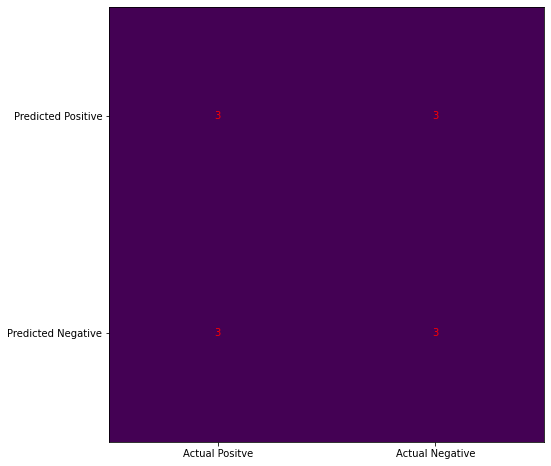

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(y))]

In [31]:
# predict probabilities
lr_probs = model.predict_proba(xe)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [32]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


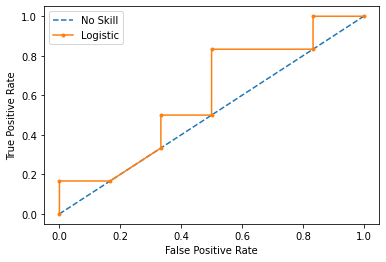

In [33]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Conclusión**

La edad del paciente no es un buen indicador para saber si la enfermedad avanza o no. El modelo no resulta bueno, pues en la matriz de confusión y en la curva ROC podemos ver que cada paciente lo clasifica aleatoriamente.

### Logit con x_cholesterol como cariable explicativa

In [34]:
xe = datos3[["x_cholesterol"]]
y = datos3[["y"]]
x_train, x_test, y_train, y_test = train_test_split(xe, y, test_size=0.3, random_state=5)

In [35]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\Brendis\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.625

Text(0, 0.5, 'Desease Progress')

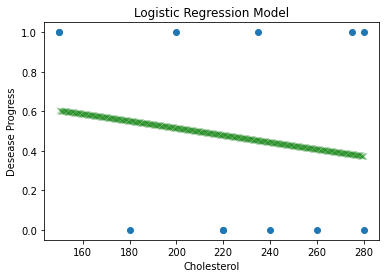

In [36]:
X = np.arange(150, 280, 0.1)
X = X.reshape(-1, 1)
plt.scatter(xe, y)
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('Cholesterol')
plt.ylabel('Desease Progress')

In [37]:
model.coef_

array([[-0.00722093]])

In [38]:
model.intercept_

array([1.50771544])

In [39]:
cm = confusion_matrix(y, model.predict(xe))

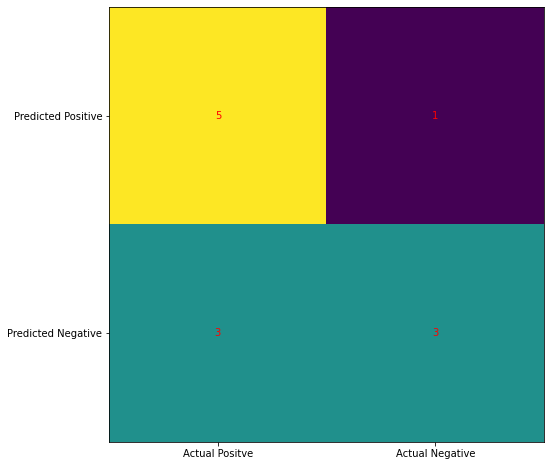

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [41]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(y))]

In [42]:
# predict probabilities
lr_probs = model.predict_proba(xe)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [43]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


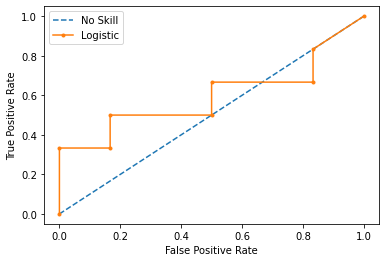

In [44]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Conclusión**

El colesterol del paciente tampoco es un buen indicador para saber si la enfermedad avanza o no. La matriz de confusión y la curva ROC resultan muy similares que con la edad.

### Logit con x_sugar como cariable explicativa

In [45]:
xe = datos3[["x_sugar"]]
y = datos3[["y"]]
x_train, x_test, y_train, y_test = train_test_split(xe, y, test_size=0.3, random_state=5)

In [46]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\Brendis\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

Text(0, 0.5, 'Desease Progress')

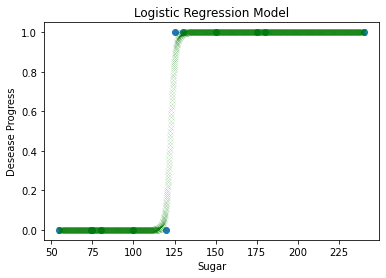

In [47]:
X = np.arange(55, 240, 0.1)
X = X.reshape(-1, 1)
plt.scatter(xe, y)
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('Sugar')
plt.ylabel('Desease Progress')

In [48]:
model.coef_

array([[0.7157536]])

In [49]:
model.intercept_

array([-87.67981786])

In [50]:
cm = confusion_matrix(y, model.predict(xe))

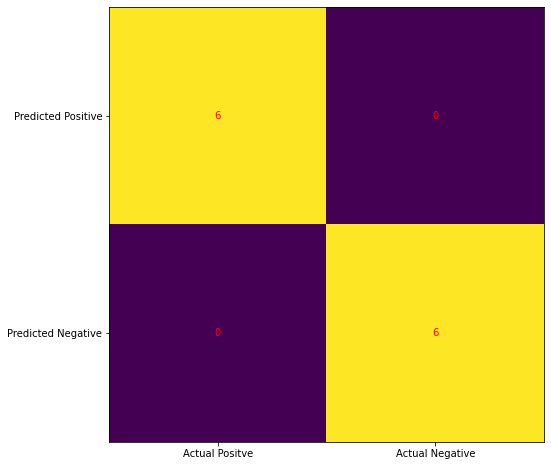

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [52]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(y))]

In [53]:
# predict probabilities
lr_probs = model.predict_proba(xe)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [54]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


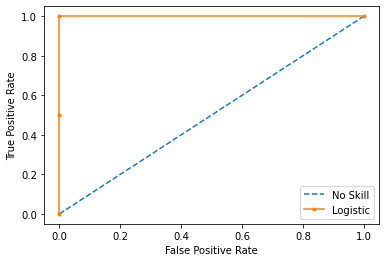

In [55]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Conclusión**

El azúcar del paciente resulta ser un excelente indicador para saber si la enfermedad avanza o no. El modelo clasifica correctamente a cada uno de los 12 pacientes, como se muetra en la matríz de confusión. La curva ROC también permite concluir que el modelo es muy bueno.

Interpretando el coeficiente estimado tendríamos que exp(0.7157536) = 2, lo que implica que por cada unidad que se incrementa el azucar, la posibilidad de que la enfermedad progrese se duplica.

Un buen criterio podría ser: niveles mayores a 125 hacen que la enfermedad progrese.

### Logit con x_Tcell como cariable explicativa

In [56]:
xe = datos3[["x_Tcell"]]
y = datos3[["y"]]
x_train, x_test, y_train, y_test = train_test_split(xe, y, test_size=0.3, random_state=5)

In [57]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\Brendis\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

Text(0, 0.5, 'Tcell')

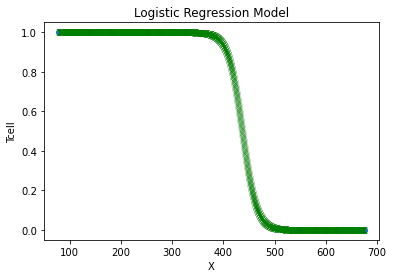

In [58]:
X = np.arange(80, 674, 0.1)
X = X.reshape(-1, 1)
plt.scatter(xe, y)
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Tcell')

In [59]:
model.coef_

array([[-0.07262875]])

In [60]:
model.intercept_

array([31.70077079])

In [61]:
cm = confusion_matrix(y, model.predict(xe))

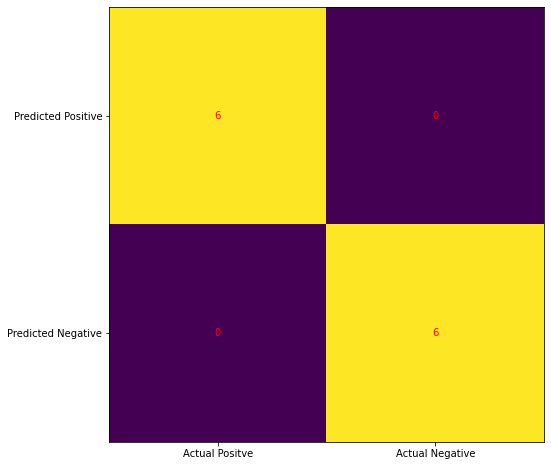

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [63]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(y))]

In [64]:
# predict probabilities
lr_probs = model.predict_proba(xe)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [65]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


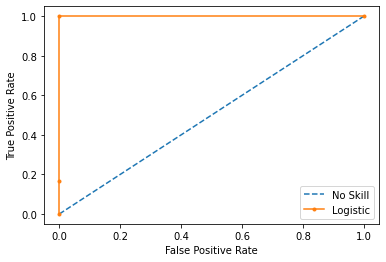

In [66]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Conclusión**

Al igual que con el azúcar, el conteo de células T del paciente resulta ser un excelente indicador para saber si la enfermedad avanza o no. El modelo clasifica correctamente a cada uno de los 12 pacientes, como se muetra en la matríz de confusión. La curva ROC también permite concluir que el modelo es muy bueno.

Interpretando el coeficiente estimado tendríamos que exp(-0.07262875) =0.9299, lo que implica que por cada unidad que se incrementa en las cálulas T, la posibilidad de que la enfermedad progrese es apenas el 93% de que no lo haga.

Un buen criterio podría ser: niveles mayores a 400 hacen que la enfermedad *no* progrese.

## Problema 4

Usando un perceptrón multicapa con Keras, produzca un cono con la dimensión de su elección. Observación: En otras palabras, use la ecuación de un cono, luego genere datos artificiales para generar X, Y y Z. Luego use datos de X, Y y Z para entrenar una red neuronal, y luego forme un cono pero producido por la red neuronal. En su informe debe mencionar la ecuación del cono que seleccionó y las cifras generadas por la ecuación y por su red neuronal.

### Solución

Se tomo la ecuación

$$z = \sqrt{x^2+y^2},$$

aleatoriamente se generaron 1000 valores de $x$ y $y$ entre $-2$ y $2$ y se estimó la $z$ para cada par ordenado.

In [67]:
random.seed(10)
a = np.random.uniform(-2,2,1000)
b = np.random.uniform(-2,2,1000)
z = np.sqrt(a**2+b**2)

Los siguientes son los valores de $(x,y)$ que se usaron en la red neuronal

In [68]:
x_train = np.array(np.dstack((a,b)))
x_train = np.reshape(x_train, (1000, 2))
print(x_train[0:5])

[[-0.15921664  0.97939351]
 [ 0.94816047 -0.81292944]
 [-0.74733517  1.19540253]
 [-1.83263539 -0.02023858]
 [-0.62859673 -1.44404259]]


La gráfica de las coordenadas simuladas es:

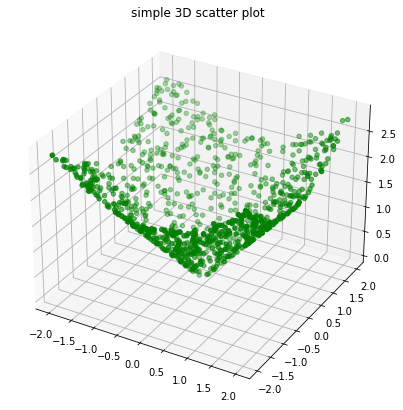

In [69]:
#from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(a, b, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

Se hizo una red neuronal con 3 capas de la siguiente forma

In [73]:
# The input and output, i.e. truth table, of a NAND gate
#x_train = np.array(np.dstack((a,b)))
#x_train = np.reshape(x_train, (1000, 2))
# Create neural networks model
modelcono = Sequential()
# Add layers to the model
modelcono.add(Dense(5, activation='relu', input_dim=2))      # first hidden layer
modelcono.add(Dense(3, activation='relu'))                   # second hidden layer
modelcono.add(Dense(4, activation='relu'))
modelcono.add(Dense(1, activation='relu'))                   # output layer
 
# Compile the neural networks model
modelcono.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
# Train the neural networks model
modelcono.fit(x_train, z, epochs=1000)
clear_output()

Finalmente, se generaron otros 500 valores entre -3 y 3 y se obtuvo la tercera coordenada con la red neuronal.

In [74]:
xt = np.random.uniform(-3,3,500)
yt = np.random.uniform(-3,3,500)
x_test = np.array(np.dstack((xt,yt)))
x_test = np.reshape(x_test, (500, 2))
zt = modelcono.predict(x_test)

En la siguiente gráfica se muestra en verde los datos con los que se entrenó la red y en rojo los obtenidos con ésta.

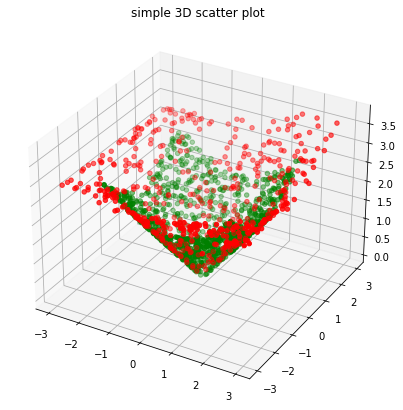

In [75]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(a, b, z, color = "green")
ax.scatter3D(xt, yt, zt, color = "red")
plt.title("simple 3D scatter plot")
# show plot
plt.show()

Es evidente que la red neuronal funciona muy bien.